In [24]:
import pandas as pd

## Informações da base de dados

In [25]:
df = pd.read_csv("../data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
df.info()

Linhas: 891, Colunas: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Perguntas:
- Quais colunas têm valores ausentes?
- Quais colunas são úteis para o modelo?
- Quais colunas são categóricas?

## Estatísticas

In [27]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# Analisando colunas categóricas
print("\nDistribuição da coluna 'Sex':")
print(df['Sex'].value_counts())

print("\nDistribuição da coluna 'Embarked':") # porto que embarcou: C = Cherbourg, Q = Queenstown, S = Southampton
print(df['Embarked'].value_counts())

print("\nDistribuição da coluna 'Survived:") # se sobreviveu ou não: 0 = No, 1 = Yes
print(df['Survived'].value_counts())

print("\nDistribuição da coluna 'PClass'") # classe economica do ticket de embarque: 1 = 1st, 2 = 2nd, 3 = 3rd
print(df['Pclass'].value_counts())



Distribuição da coluna 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64

Distribuição da coluna 'Embarked':
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Distribuição da coluna 'Survived:
Survived
0    549
1    342
Name: count, dtype: int64

Distribuição da coluna 'PClass'
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Análise de Valores Nulos

| Coluna   | Nulos | % de nulos | Observação |
|----------|-------|------------|------------|
| Cabin    | 687   | ~77%       | Remover (muitos valores ausentes) |
| Age      | 177   | ~20%       | Preencher com média ou mediana |
| Embarked | 2     | <1%        | Preencher com valor mais frequente |


Colunas Categóricas

| Coluna     | Tipo       | Ação a ser tomada                           |
|------------|------------|---------------------------------------------|
| Sex        | Categórica | Transformar em 0/1                          |
| Embarked   | Categórica | Transformar em dummies futuramente (S, C, Q)|
| Name       | Texto      | Ignorar por agora                           |
| Ticket     | Texto      | Ignorar por agora                           |
| Cabin      | Texto      | Remover (muitos valores ausentes)           |


## Limpeza dos dados

In [30]:
# removendo colunas que não vou usar por agora
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# preenchendo valores ausentes em "Age" com a mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# preenchendo valores ausentes em "Embarked" com a moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [31]:
# convertendo as colunas categoricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # sex
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # Embarked

In [32]:
print(df.info())
print(df.isnull().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB
None
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


## Preparando o modelo para teste e treino

In [33]:
features = df.drop('Survived', axis=1).columns.tolist()

X = df[features]
y = df['Survived']
print(features)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45
)


In [35]:
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

X_train: (712, 8)
X_test:  (179, 8)
y_train: (712,)
y_test:  (179,)


## Criar e treinar o modelo

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
modelo = LogisticRegression(max_iter=1000) # criando o modelo
modelo.fit(X_train, y_train) # treinando o modelo
y_pred = modelo.predict(X_test)

y_proba = modelo.predict_proba(X_test) # probabilidade para cada classe

## Avaliação do modelo

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Acurácia: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.76      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

Acurácia: 0.84


Verdadeiros Negativos (TN): 102
Falsos Positivos (FP): 15
Falsos Negativos (FN): 14
Verdadeiros Positivos (TP): 48


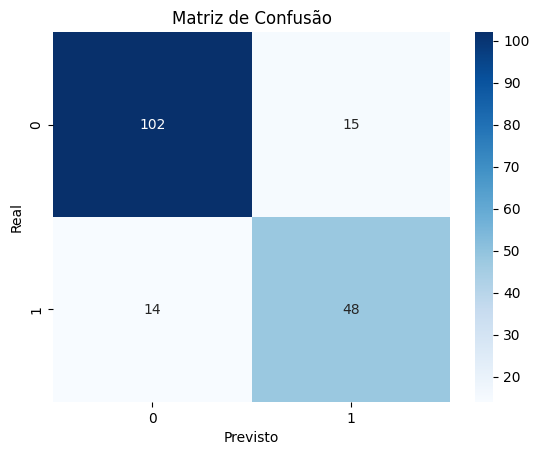

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdadeiros Positivos (TP): {tp}")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## Previsões

In [41]:
df_test = pd.read_csv('../data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
# Fazendo o mesmo pré-processamento no conjunto de teste
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test['Embarked'] = df_test['Embarked'].fillna('S')

df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)

In [43]:
# selecionando as mesmas features que foram usadas no treinamento
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X_real_test = df_test[features]
y_real_pred = modelo.predict(X_real_test)

Salvando o resultado da predição em um arquivo csv

In [44]:
output = pd.DataFrame({ 'PassengerId': df_test['PassengerId'], 'Survived': y_real_pred.astype(int)})
output.to_csv('../survival-prediction.csv', index=False)
print("Arquivo de previsão salvo como 'survival-prediction.csv'!")
print(output.head())

Arquivo de previsão salvo como 'survival-prediction.csv'!
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


Salvando o modelo pré processado para usar no dashboard

In [49]:
import joblib
joblib.dump(modelo, '../model/titanic_model.pkl')


['../model/titanic_model.pkl']